# Simulations of the semi-discrete prey-predator models

In [27]:
#Dependancies
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

## 1. Model without interaction

In [28]:
#Definition of the semi-discrete model
def sd_model(
    xy: list,
    t = np.linspace(0,20,201),
    r: float = 0.5,
    K: float = 10,
    a: float = 20,
    c: float = 20,
    m: float = 0.5,
    gamma: float = 0.8,
) -> list:
    
    '''This model is a continuous model that describes the evolution of a pest population x and a predator population y 
    
    Param:
        xy: a list of values of [x,y] at a time t_n
        r: growth rate
        K: carrying capacity
        a: search rate
        c: half-saturation constant
        m: death rate
        gamma: conversion factor
        
    Return:
        dx, dy: a list of the two population size of x and y at time t_{n+1}'''
    
    #Initialisation
    x = xy[0]
    y = xy[1]

    #Continuous part of the model
    dx = r*x * (1 - x/K) - a*x*(c + x) * y
    dy = gamma * a*x*(c + x) * y - m*y

    return dx, dy



Check if the condition of GAS is filled

$\mu = 1$  
$c > K$  
$\frac{rmc}{a} = 0.25$  
$\mu > \frac{rmc}{a}$  
The condition is satisfied.


In [29]:
#The implementation is not useful. I need to only put the correct initial condition
#x_p(t) will be defined as np.zeros_like(t)

#y_p(t)
#def y_p(t, m, mu, T):
    #'''This function is the periodic solution of y
    
    #Param:
        #t: time point(s)
        #m: mortality rate in the model
        #mu: release rate in the model
        #T: release period in the model
        
    #Return:
        #result: y_p evaluated in t'''
    
    #result = mu*T/(1 - np.exp(-m*T)) * np.exp(-m * (t % T))
    #return result

The problem is not about the index i of t, it is really about the partition of the interval. It should have been obvious because the periodic solution doesn't have this behaviour  
Something that bothers me is that, even if it's very close to 0, x shouldn't be negative.

## Attempt to solve the ODE in one function

In [30]:
def solve_ode(
    xy: np.ndarray,
    r: float = 0.5,
    K: float = 10,
    a: float = 20,
    c: float = 20,
    m: float = 0.5,
    gamma: float = 0.8,
    mu: float = 1,
    T: float = 5,
    t: np.ndarray = np.linspace(0,20,201)
        
) -> np.ndarray:
    '''This function gives the anwser of the semi-discrete ODE system with the chosen model 
    
    Param:
        model: the chosen model
        xy: put the initial value here. It will be changed along the for loop
        r: growth rate
        K: carrying capacity
        a: search rate
        c: half-saturation constant
        m: death rate
        gamma: conversion factor
        mu: release rate
        T: release period
        t: vector of time points
        
    Return:
        x, y: values of the solution (x, y) of the ODE at the time points t'''
    
    #Store solution in arrays
    x = np.empty_like(t)
    y = np.empty_like(t)

    #Record initial conditions
    x[0] = xy[0]
    y[0] = xy[1]

    #Solve ODE
    xy_step = xy
    for i in range(1,len(t)):
        #Span for next time step
        tspan = [t[i-1],t[i]] 
        #Solve for next step
        xy_step = odeint(sd_model, xy_step, tspan, args=(r, K, a, c, m, gamma)) 
        x[i] = xy_step[1][0] #add a value to x
        if t[i-1] % T == 0 and t[i-1] > 0:
            print('release period at', t[i-1])
            y[i] = y[i-1] + mu*T #add a value to if t is a multiple of T
        else:
            y[i] = xy_step[1][1] #add a value to if t is not a multiple of T
        #next initial condition
        xy_step = [x[i],y[i]]

    return x, y

## Run in one function

Run the function for the periodical solution

In [31]:
#Initial conditions
mu = 1
T = 5
m=0.5
y_p_0_test = mu*T/(1 - np.exp(-m*T))
xy_p_0_test = [0, y_p_0_test]

In [32]:
#Solve ODE
xy_p_test = solve_ode(xy_p_0_test)

release period at 5.0
release period at 10.0
release period at 15.0


In [33]:
x_p_test = xy_p_test[0]
y_p_test = xy_p_test[1]

Run the function for the initial value [1, 3]

In [34]:
#Initial condition
x0_test = 1 
y0_test = 3
x0y0_test = [x0_test, y0_test]

In [35]:
#Solve ODE
xy_test = solve_ode(x0y0_test)

release period at 5.0
release period at 10.0
release period at 15.0


In [36]:
x_test = xy_test[0]
y_test = xy_test[1]

Plot the figures

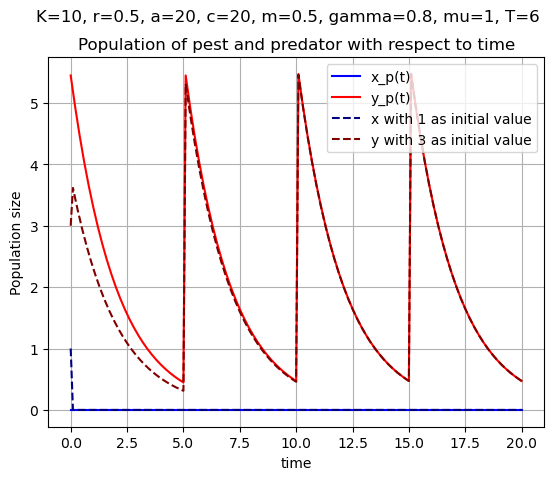

In [37]:
plt.plot(t, x_p_test, color = (0,0,1), label = 'x_p(t)')
plt.plot(t, y_p_test, color = (1,0,0), label = 'y_p(t)')
plt.plot(t, x_test, color = (0,0,0.5), linestyle='--', label='x with 1 as initial value')
plt.plot(t, y_test, color = (0.5,0,0), linestyle='--', label='y with 3 as initial value')
plt.xlabel('time')
plt.ylabel('Population size')
plt.title('Population of pest and predator with respect to time')
plt.suptitle('K=10, r=0.5, a=20, c=20, m=0.5, gamma=0.8, mu=1, T=6')
plt.legend()
plt.grid()
plt.show()